In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas.plotting import scatter_matrix
# Importing Libaries

In [ ]:
from google.colab import files
uploaded = files.upload()
# Upload the csv, a promt will appear and you will need to upload the College.csv file from your local drive.

In [ ]:
df =pd.read_csv('College.csv')
print(df)
# Load the csv and assign in to df.

                         Unnamed: 0 Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28   

     Top25perc  F.Undergrad

In [ ]:
df.set_index("Unnamed: 0", inplace = True)
df.head()
# Assign the first variable as index, then delete it.

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
summary=df.describe()
print(summary)
# Provide a summary.

               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

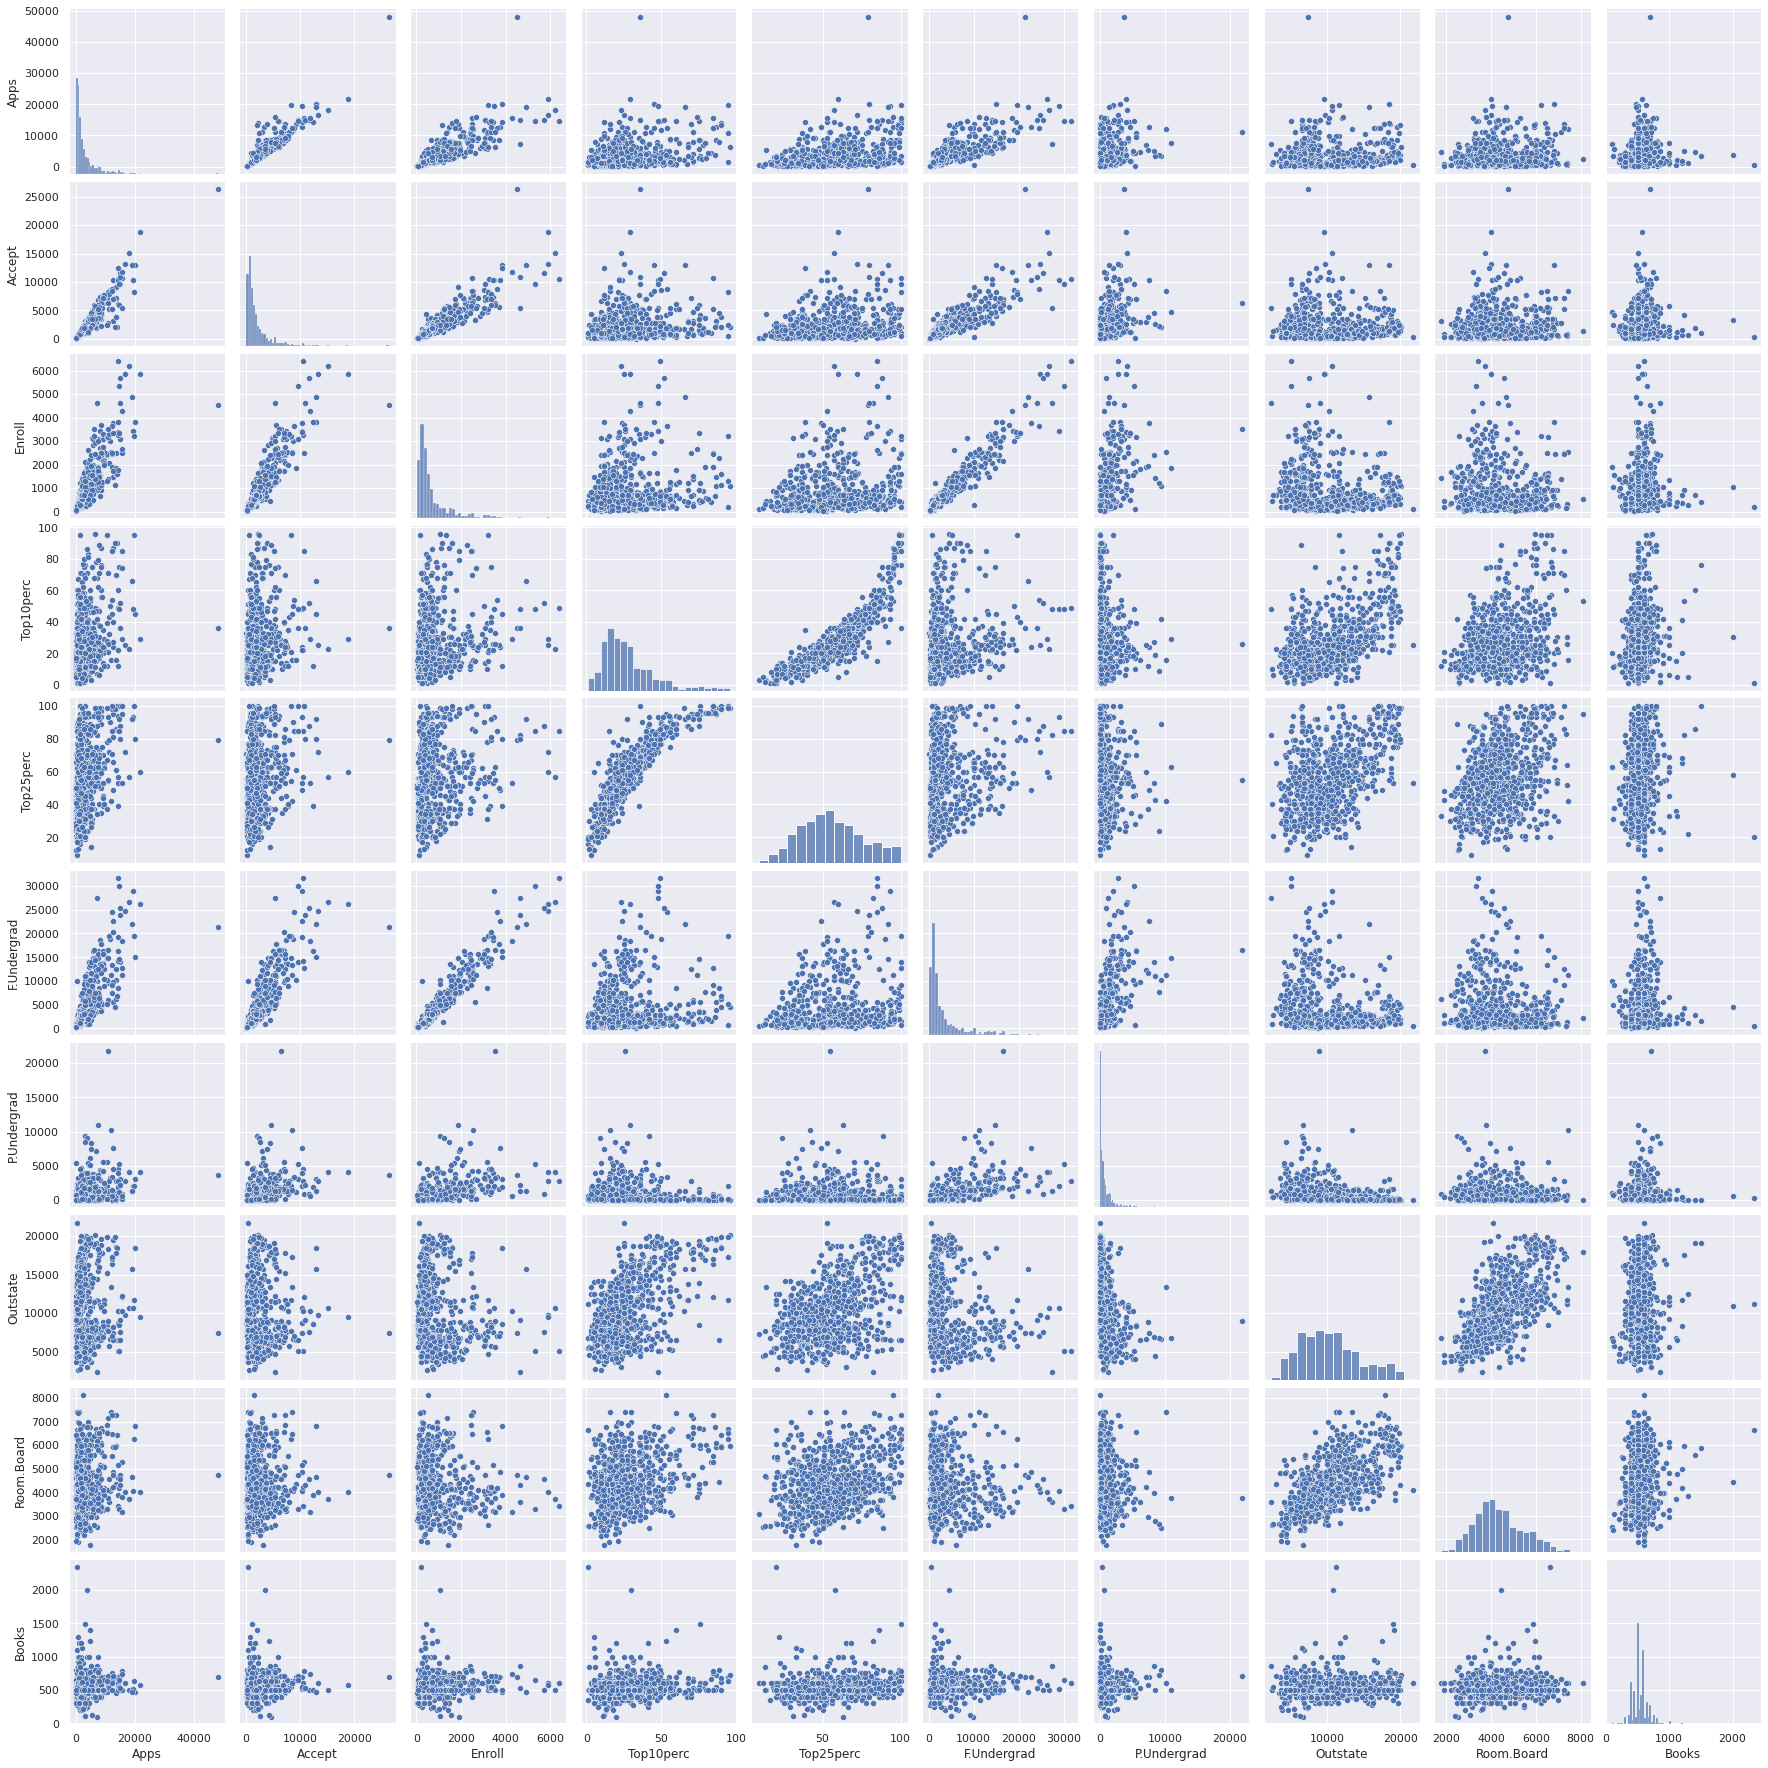

In [ ]:
y = sns.pairplot(df.loc[:, "Apps":"Books"])
plt.show()
# Provide a pairs plot of the first ten numeric variables.

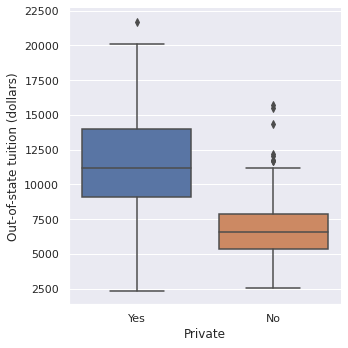

In [ ]:
ax = sns.catplot(x = "Private", y = "Outstate", kind = "box", order = ["Yes", "No"], data = df)
ax.set(ylabel = "Out-of-state tuition (dollars)")
plt.show()
# A boxplot of Private vs Outstate.

Elite
No     699
Yes     78
Name: Elite, dtype: int64


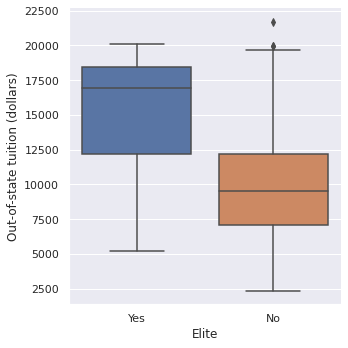

In [ ]:
# Create a new column called Elite and set the default value as "No".
# Select all rows (i.e. schools) with over 50% of their students coming from the top 10% of their high school class.
# Set the value of the Elite column for those schools to "Yes".
df["Elite"] = "No"
df.loc[df["Top10perc"] > 50, "Elite"] = "Yes"
# Count the occurnce of Elite.
dfen = df["Elite"].groupby(by = df["Elite"]).count()
print (dfen)
# Create a boxploy of Outstate vs Elite.
ax = sns.catplot(x = "Elite", y = "Outstate", kind = "box", order = ["Yes", "No"], data = df)
ax.set(ylabel = "Out-of-state tuition (dollars)")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Histograms by school types')

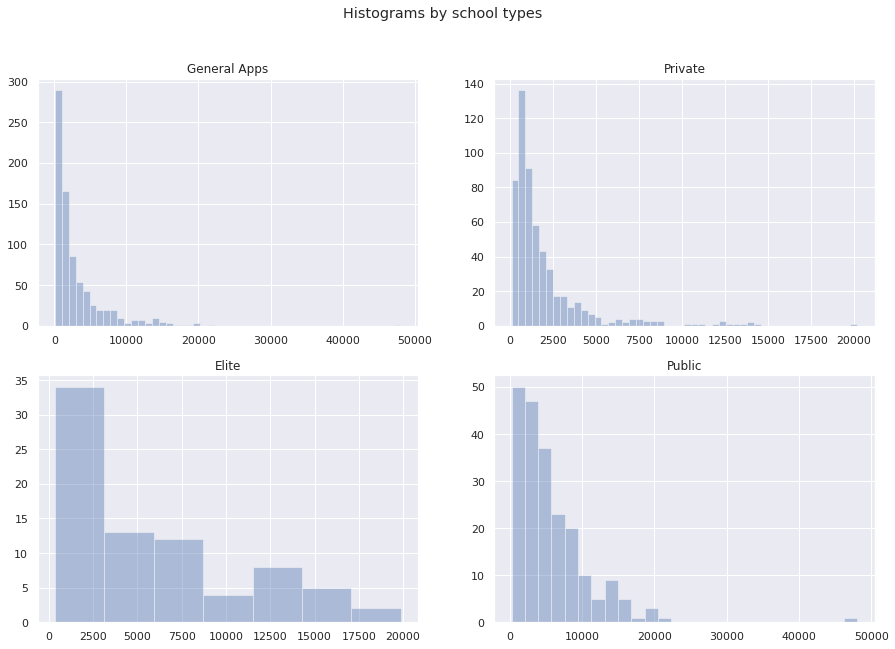

In [ ]:
# Create grid of plots.
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

# Create hist for number of app.
sns.distplot(df["Apps"], kde = False, ax = axes[0, 0])
axes[0, 0].set(xlabel = "", title = "General Apps")

# Create hist for apps at private .
sns.distplot(df.loc[df["Private"] == "Yes", "Apps"], kde = False, ax = axes[0, 1])
axes[0, 1].set(xlabel = "", title = "Private")

# Create hist of apps at elite. 
sns.distplot(df.loc[df["Elite"] == "Yes", "Apps"], kde = False, ax = axes[1, 0])
axes[1, 0].set(xlabel = "", title = "Elite")

# Create hist of apps public.
sns.distplot(df.loc[df["Private"] == "No", "Apps"], kde = False, ax = axes[1, 1])
axes[1, 1].set(xlabel = "", title = "Public")
# Title
fig.suptitle("Histograms by school types")

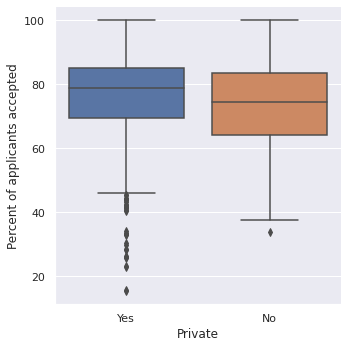

         count       mean        std        min        25%        50%  \
Private                                                                 
No       212.0  72.653048  14.648225  33.970598  64.118423  74.433872   
Yes      565.0  75.458118  14.673495  15.448631  69.490555  78.856526   

               75%    max  
Private                    
No       83.422508  100.0  
Yes      85.102740  100.0  


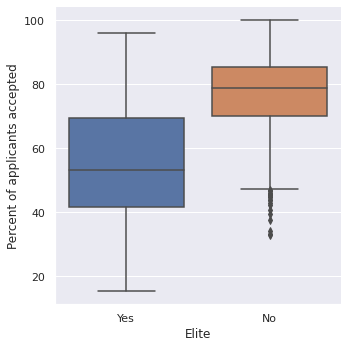

In [ ]:
# Make a column for the acceptance percentage of each school
df["AcceptPerc"] = df["Accept"] / df["Apps"] * 100
# Side-by-side boxplots for public vs private schools
ax = sns.catplot(x = "Private", y = "AcceptPerc", kind = "box", order = ["Yes", "No"], data = df)
ax.set(ylabel = "Percent of applicants accepted")
plt.show()
# Generate numerical summary of acceptance percentage, public vs private schools
dfs = df["AcceptPerc"].groupby(by = df["Private"]).describe()
print(dfs)
# Side-by-side boxplots for elite vs non-elite schools
ax = sns.catplot(x = "Elite", y = "AcceptPerc", kind = "box", order = ["Yes", "No"], data = df)
ax.set(ylabel = "Percent of applicants accepted")
plt.show()

The boxplots show that while the median acceptance percentages for both types of schools are pretty close at around 70-80%, private schools have a much wider range of acceptance rates (going down to a minimum of 15.45%).


END